In [2]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import datetime

# makes sure charts appear in the notebook rather than a popup window
%matplotlib inline

In [3]:
#Import csv file

ud = pd.read_csv("3.1-data-sheet-udemy-courses-business-courses.csv")
ud

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576.0,936.0,24.0,All Levels,0.560000,8.0,2013-04-20T02:25:22Z,Business Finance
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659.0,4397.0,16.0,Beginner Level,0.950000,1.5,2013-04-07T21:39:25Z,Business Finance
2,133536.0,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855.0,2698.0,15.0,All Levels,0.910000,1.5,2013-12-25T19:53:34Z,Business Finance
3,151668.0,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167.0,1463.0,8.0,All Levels,0.180000,1.5,2014-05-27T16:22:16Z,Business Finance
4,648826.0,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481.0,2347.0,174.0,All Levels,0.370000,10.0,2016-01-21T01:38:48Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
1187,1231958.0,60 Minutes to Fundamental Accounting Skills,https://www.udemy.com/60-minute-fundamental-ac...,75.0,0.0,0.0,9.0,All Levels,0.950000,2.5,2017-06-28T21:55:29Z,Business Finance
1188,1057040.0,Teeter-Totter Accounting,https://www.udemy.com/teeter-totter-accounting/,90.0,0.0,0.0,12.0,Intermediate Level,0.360000,1.0,2017-02-08T22:15:56Z,Business Finance
1189,1258666.0,Financial Statement Auditing Cycles,https://www.udemy.com/financial-statement-audi...,50.0,0.0,0.0,9.0,All Levels,0.150000,2.0,2017-06-29T23:20:10Z,Business Finance
1190,1232282.0,The Cash Flow Statement - An Introduction,https://www.udemy.com/cash-flow-statement-intr...,50.0,0.0,0.0,10.0,All Levels,0.180000,1.5,2017-06-28T16:05:51Z,Business Finance


In [4]:
#Check the data types

ud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            1191 non-null   float64
 1   course_title         1191 non-null   object 
 2   url                  1191 non-null   object 
 3   price                1191 non-null   float64
 4   num_subscribers      1191 non-null   float64
 5   num_reviews          1191 non-null   float64
 6   num_lectures         1191 non-null   float64
 7   level                1191 non-null   object 
 8   Rating               1192 non-null   float64
 9   content_duration     1191 non-null   float64
 10  published_timestamp  1191 non-null   object 
 11  subject              1191 non-null   object 
dtypes: float64(7), object(5)
memory usage: 111.9+ KB


In [5]:
#Check the number of null values

ud.isna().sum()

course_id              1
course_title           1
url                    1
price                  1
num_subscribers        1
num_reviews            1
num_lectures           1
level                  1
Rating                 0
content_duration       1
published_timestamp    1
subject                1
dtype: int64

In [6]:
#Check the maximum rate in order to understand what is the unit of the Rating column

ud["Rating"].max()

#We will multiply the rating by 10 in order to have a rate / 10 instead of a float

1.0

In [7]:
#Check if there are duplicates

ud["course_id"].nunique()

#There are 1191 unique values, and we know that there is one null value in the course_id column, so all the other course_id are uniques.

1191

In [8]:
#Remove the null values

ud = ud.dropna(subset=['course_id'])

#ud["course_id"] = ud["course_id"].drop(1191)
#ud["course_id"]

In [9]:
ud["content_duration"].unique()

array([ 8.        ,  1.5       , 10.        ,  3.5       ,  7.5       ,
       16.        ,  2.        ,  1.        ,  5.5       ,  3.        ,
        2.5       , 11.5       ,  4.5       , 11.        ,  6.5       ,
        4.        ,  5.        ,  0.58333333,  0.61666667,  0.53333333,
        0.51666667,  7.        ,  9.        , 43.5       ,  8.5       ,
       12.        , 24.5       , 20.5       , 31.5       , 39.        ,
        6.        ,  9.5       , 17.5       ,  0.7       ,  0.6       ,
       13.        ,  0.68333333,  0.73333333,  0.63333333, 14.5       ,
        0.55      , 71.5       , 46.5       , 20.        , 19.5       ,
        0.66666667, 62.        ,  0.71666667, 26.        , 18.        ,
       12.5       , 29.        ,  0.56666667, 14.        , 13.5       ,
        0.65      , 10.5       ,  0.31666667, 33.        , 29.5       ,
       45.        , 18.5       ,  0.45      ,  0.13333333, 70.        ,
       24.        , 47.        ,  0.5       ,  0.46666667,  0.  

In [10]:
#Convert data types

ud["course_id"] = ud["course_id"].astype(int)
ud["num_subscribers"] = ud["num_subscribers"].astype(int)
ud["num_reviews"] = ud["num_reviews"].astype(int)
ud["num_lectures"] = ud["num_lectures"].astype(int)


/var/folders/fp/nkvz8km55ybd4yzr2wcb2pjr0000gn/T/ipykernel_15663/2715242729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ud["course_id"] = ud["course_id"].astype(int)
/var/folders/fp/nkvz8km55ybd4yzr2wcb2pjr0000gn/T/ipykernel_15663/2715242729.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ud["num_subscribers"] = ud["num_subscribers"].astype(int)
/var/folders/fp/nkvz8km55ybd4yzr2wcb2pjr0000gn/T/ipykernel_15663/2715242729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [11]:
ud["Rating"] = ud["Rating"] * 10

/var/folders/fp/nkvz8km55ybd4yzr2wcb2pjr0000gn/T/ipykernel_15663/2107831108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ud["Rating"] = ud["Rating"] * 10


In [12]:
ud.loc[(ud["course_id"] == 52118), "course_title"].str.split(',')

147    [Multiply your returns using 'Value Investing"...
Name: course_title, dtype: object

In [13]:
ud.loc[(ud["course_id"] == 52118)]

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
147,52118,"Multiply your returns using 'Value Investing"",...",https://www.udemy.com/weekly-forex-analysis-by...,0.0,3035,12,14,Beginner Level,9.6,1.5,2016-06-20T21:02:36Z,Business Finance


array([  0., 195., 200.,  60.,  95.,  20., 100.,  30.,  75., 180., 150.,
       155.,  45., 105., 185.,  50., 115., 125.,  25., 160., 120.,  90.,
       175.,  40.,  35., 145., 170., 190.,  80.,  65., 140.,  70.,  55.,
       130.,  85., 165., 135., 110.,  nan])

In [14]:
ud[0:20]

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,49798,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576,936,24,All Levels,5.6,8.0,2013-04-20T02:25:22Z,Business Finance
1,48841,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659,4397,16,Beginner Level,9.5,1.5,2013-04-07T21:39:25Z,Business Finance
2,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855,2698,15,All Levels,9.1,1.5,2013-12-25T19:53:34Z,Business Finance
3,151668,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167,1463,8,All Levels,1.8,1.5,2014-05-27T16:22:16Z,Business Finance
4,648826,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481,2347,174,All Levels,3.7,10.0,2016-01-21T01:38:48Z,Business Finance
5,97338,Forex Basics,https://www.udemy.com/forex-basics/,0.0,22344,712,26,All Levels,8.9,3.5,2013-10-16T17:40:23Z,Business Finance
6,321410,Beginner to Pro in Excel: Financial Modeling a...,https://www.udemy.com/beginner-to-pro-in-excel...,195.0,22257,2697,138,Intermediate Level,1.3,7.5,2014-11-25T23:00:40Z,Business Finance
7,301442,Black Algo Trading: Build Your Trading Robot,https://www.udemy.com/build-your-trading-robot/,200.0,20195,1113,227,All Levels,2.1,16.0,2014-10-27T22:01:36Z,Business Finance
8,189160,Financial Analysis: A Recipe for Success,https://www.udemy.com/financial-analysis-a-rec...,0.0,19614,635,14,All Levels,3.0,1.5,2014-04-23T15:10:52Z,Business Finance
9,191854,Stock Market Foundations,https://www.udemy.com/how-to-invest-in-the-sto...,0.0,19339,794,9,All Levels,8.9,2.0,2014-03-31T21:35:06Z,Business Finance


In [31]:
#BoxPlots

[Text(0, 0, 'All Levels'),
 Text(1, 0, 'Beginner Level'),
 Text(2, 0, 'Intermediate Level'),
 Text(3, 0, 'Expert Level')]

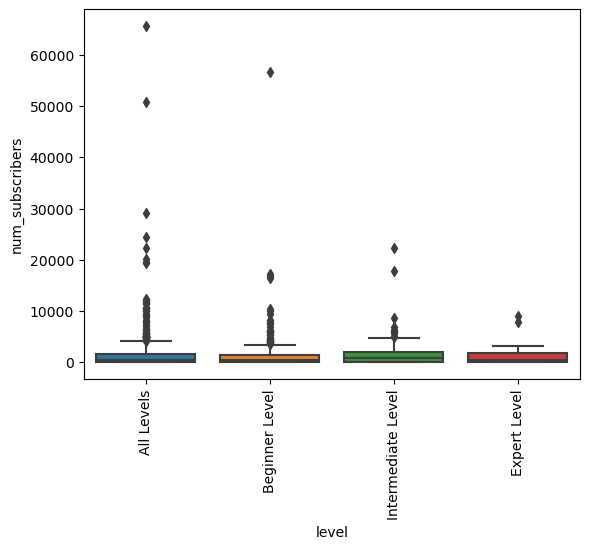

In [15]:
ax = sns.boxplot(x="level", y="num_subscribers", data=ud)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#Presence of outliers

In [16]:
ud[["level"]]

,level
0,All Levels
1,Beginner Level
2,All Levels
3,All Levels
4,All Levels
...,...
1186,Beginner Level
1187,All Levels
1188,Intermediate Level
1189,All Levels


In [17]:
ud.loc[(ud["level"] != "All Levels")]

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
1,48841,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659,4397,16,Beginner Level,9.5,1.500000,2013-04-07T21:39:25Z,Business Finance
6,321410,Beginner to Pro in Excel: Financial Modeling a...,https://www.udemy.com/beginner-to-pro-in-excel...,195.0,22257,2697,138,Intermediate Level,1.3,7.500000,2014-11-25T23:00:40Z,Business Finance
10,754028,Financial Accounting - A Brief Introduction,https://www.udemy.com/accounting-in-less-then-...,0.0,17847,1440,17,Intermediate Level,3.4,1.000000,2016-02-24T14:53:28Z,Business Finance
11,265960,Fundamentals of Forex Trading,https://www.udemy.com/fundamentals-of-forex-tr...,0.0,17160,620,23,Beginner Level,6.9,1.000000,2014-08-29T20:10:38Z,Business Finance
12,308690,Forex Trading A-Z™ - With LIVE Examples of For...,https://www.udemy.com/forex-trading/,195.0,16900,2476,52,Beginner Level,1.6,5.500000,2014-12-12T23:58:39Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
1172,975910,How to achieve personal transformation,https://www.udemy.com/learnhowtocreatewealth/,20.0,0,0,10,Beginner Level,4.7,0.533333,2016-12-22T00:28:07Z,Business Finance
1173,1136038,Free Ways to Create Passive Income Online,https://www.udemy.com/how-to-make-passive-inco...,25.0,0,0,27,Beginner Level,4.2,1.000000,2017-04-17T22:33:13Z,Business Finance
1175,1251654,Understand Core Finance Principles in 60 Minutes,https://www.udemy.com/core-finance-principles-...,75.0,0,0,13,Beginner Level,8.5,2.500000,2017-06-29T22:04:17Z,Business Finance
1186,885413,Foundations of Investing,https://www.udemy.com/foundations-of-investing/,40.0,0,0,18,Beginner Level,9.5,2.000000,2016-07-27T21:07:46Z,Business Finance


In [18]:
ud_1 = ud.loc[(ud["num_subscribers"] <= 2000) & (ud["level"] != "All Levels")]

In [19]:
ud_8 = ud.loc[(ud["num_subscribers"] <= 2000)]

In [20]:
ud_8

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
246,319020,Investing: How I Consistently Beat The Stock M...,https://www.udemy.com/beat-the-stock-market/,200.0,2000,31,34,Intermediate Level,8.1,4.5,2014-12-11T20:35:05Z,Business Finance
247,474928,Intermediate Options trading concepts for Stoc...,https://www.udemy.com/intermediate-options-tra...,40.0,2000,30,9,Beginner Level,3.0,1.0,2015-04-13T20:28:04Z,Business Finance
248,739390,Financial Planning & Analysis: Building a Comp...,https://www.udemy.com/financial-planning-analy...,150.0,1988,137,27,Beginner Level,6.8,1.5,2016-06-15T23:45:51Z,Business Finance
249,655300,Accounting for Beginners : Learn Basics in und...,https://www.udemy.com/accounting-for-beginners...,50.0,1971,13,20,Intermediate Level,3.8,1.5,2015-12-03T17:08:10Z,Business Finance
250,722682,Advanced Excel functions,https://www.udemy.com/advanced-excel-functions...,20.0,1964,47,15,All Levels,8.7,1.5,2016-01-12T20:03:45Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
1186,885413,Foundations of Investing,https://www.udemy.com/foundations-of-investing/,40.0,0,0,18,Beginner Level,9.5,2.0,2016-07-27T21:07:46Z,Business Finance
1187,1231958,60 Minutes to Fundamental Accounting Skills,https://www.udemy.com/60-minute-fundamental-ac...,75.0,0,0,9,All Levels,9.5,2.5,2017-06-28T21:55:29Z,Business Finance
1188,1057040,Teeter-Totter Accounting,https://www.udemy.com/teeter-totter-accounting/,90.0,0,0,12,Intermediate Level,3.6,1.0,2017-02-08T22:15:56Z,Business Finance
1189,1258666,Financial Statement Auditing Cycles,https://www.udemy.com/financial-statement-audi...,50.0,0,0,9,All Levels,1.5,2.0,2017-06-29T23:20:10Z,Business Finance


In [21]:
ud_1

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
246,319020,Investing: How I Consistently Beat The Stock M...,https://www.udemy.com/beat-the-stock-market/,200.0,2000,31,34,Intermediate Level,8.1,4.500000,2014-12-11T20:35:05Z,Business Finance
247,474928,Intermediate Options trading concepts for Stoc...,https://www.udemy.com/intermediate-options-tra...,40.0,2000,30,9,Beginner Level,3.0,1.000000,2015-04-13T20:28:04Z,Business Finance
248,739390,Financial Planning & Analysis: Building a Comp...,https://www.udemy.com/financial-planning-analy...,150.0,1988,137,27,Beginner Level,6.8,1.500000,2016-06-15T23:45:51Z,Business Finance
249,655300,Accounting for Beginners : Learn Basics in und...,https://www.udemy.com/accounting-for-beginners...,50.0,1971,13,20,Intermediate Level,3.8,1.500000,2015-12-03T17:08:10Z,Business Finance
251,637430,Learn the basics of preparing accounting state...,https://www.udemy.com/basics-of-financial-acco...,20.0,1951,30,20,Beginner Level,6.6,0.550000,2015-10-13T21:07:22Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
1172,975910,How to achieve personal transformation,https://www.udemy.com/learnhowtocreatewealth/,20.0,0,0,10,Beginner Level,4.7,0.533333,2016-12-22T00:28:07Z,Business Finance
1173,1136038,Free Ways to Create Passive Income Online,https://www.udemy.com/how-to-make-passive-inco...,25.0,0,0,27,Beginner Level,4.2,1.000000,2017-04-17T22:33:13Z,Business Finance
1175,1251654,Understand Core Finance Principles in 60 Minutes,https://www.udemy.com/core-finance-principles-...,75.0,0,0,13,Beginner Level,8.5,2.500000,2017-06-29T22:04:17Z,Business Finance
1186,885413,Foundations of Investing,https://www.udemy.com/foundations-of-investing/,40.0,0,0,18,Beginner Level,9.5,2.000000,2016-07-27T21:07:46Z,Business Finance


In [22]:
ud_beg = ud.loc[(ud["level"] == "Beginner Level")]

In [23]:
ud_int =  ud.loc[(ud["level"] == "Intermediate Level")]

In [24]:
ud_exp =  ud.loc[(ud["level"] == "Expert Level")]

In [25]:
ud_beg

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
1,48841,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659,4397,16,Beginner Level,9.5,1.500000,2013-04-07T21:39:25Z,Business Finance
11,265960,Fundamentals of Forex Trading,https://www.udemy.com/fundamentals-of-forex-tr...,0.0,17160,620,23,Beginner Level,6.9,1.000000,2014-08-29T20:10:38Z,Business Finance
12,308690,Forex Trading A-Z™ - With LIVE Examples of For...,https://www.udemy.com/forex-trading/,195.0,16900,2476,52,Beginner Level,1.6,5.500000,2014-12-12T23:58:39Z,Business Finance
13,285638,Learn to Trade for Profit:Trading with Japanes...,https://www.udemy.com/introduction-to-japanese...,60.0,16385,273,45,Beginner Level,7.8,3.000000,2014-09-02T03:53:13Z,Business Finance
24,109622,Finance - Ratios Analysis & Interpretations,https://www.udemy.com/financial-ratios/,30.0,10338,52,41,Beginner Level,8.1,2.500000,2013-10-23T18:34:25Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
1171,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,25.0,0,0,10,Beginner Level,0.7,1.000000,2016-12-15T14:56:17Z,Business Finance
1172,975910,How to achieve personal transformation,https://www.udemy.com/learnhowtocreatewealth/,20.0,0,0,10,Beginner Level,4.7,0.533333,2016-12-22T00:28:07Z,Business Finance
1173,1136038,Free Ways to Create Passive Income Online,https://www.udemy.com/how-to-make-passive-inco...,25.0,0,0,27,Beginner Level,4.2,1.000000,2017-04-17T22:33:13Z,Business Finance
1175,1251654,Understand Core Finance Principles in 60 Minutes,https://www.udemy.com/core-finance-principles-...,75.0,0,0,13,Beginner Level,8.5,2.500000,2017-06-29T22:04:17Z,Business Finance


<AxesSubplot:>

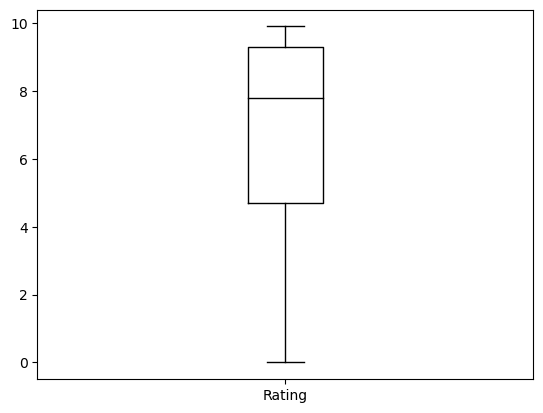

In [26]:
ud_1.boxplot(column=['Rating'], grid=False, color='black')

AttributeError: 'Text' object has no attribute 'set_xticklabels'

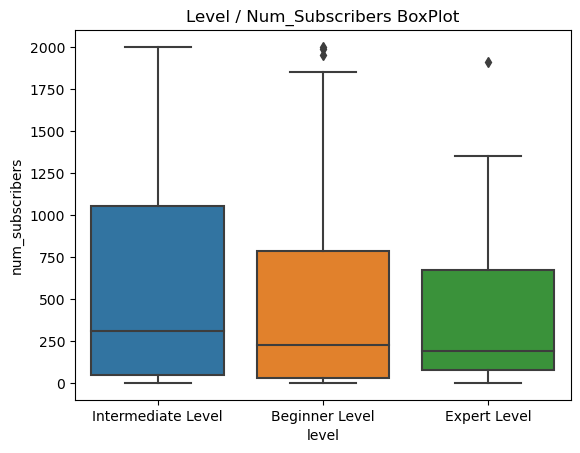

In [27]:
ax = sns.boxplot(x="level", y="num_subscribers", data=ud_1).set_title('Level / Num_Subscribers BoxPlot')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

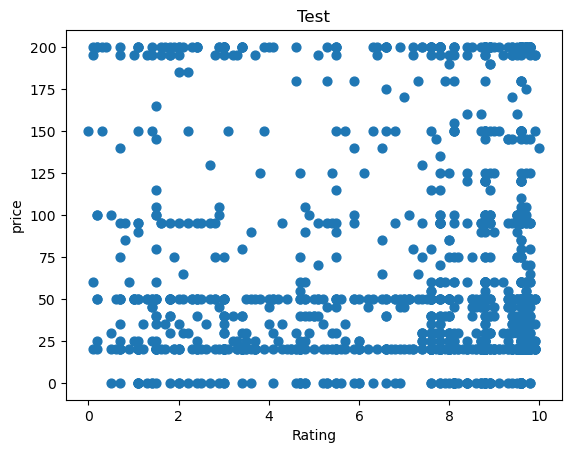

In [48]:
ud.plot.scatter(x = 'Rating', y = 'price', s = 40).set_title(
    "Test");

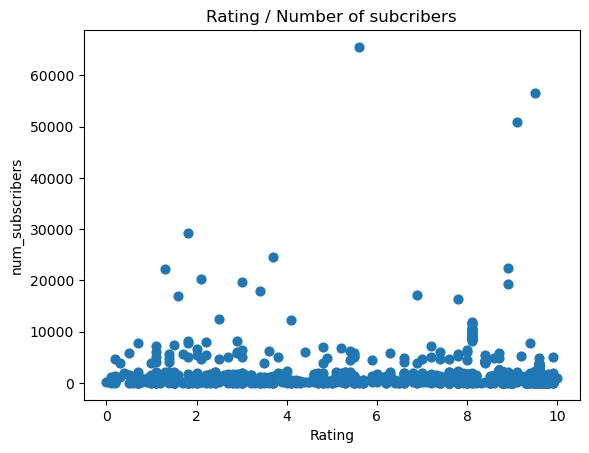

In [50]:
ud.plot.scatter(x = 'Rating', y = 'num_subscribers', s = 40).set_title(
    "Rating / Number of subcribers");

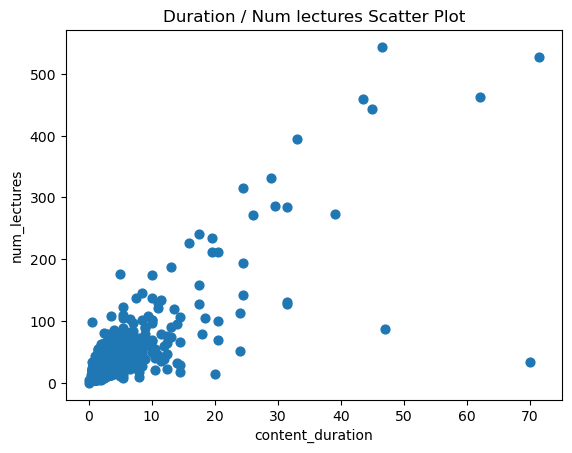

In [141]:
ud.plot.scatter(x = 'content_duration', y = 'num_lectures', s = 40).set_title(
    "Duration / Num lectures Scatter Plot");

AttributeError: 'Line2D' object has no property 's'

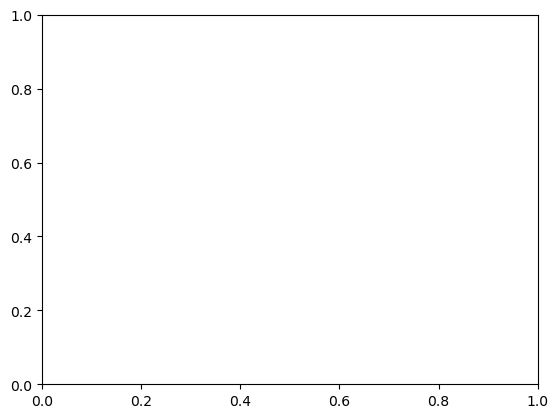

In [146]:
ud.plot.line(x = 'num_subscribers', y = 'price', s = 40).set_title(
    "Test");

In [30]:
#ud_3 = pd.DataFrame({'num_subcribers','num_reviews','num_lectures'}, index="published_timestamp")
#ud.plot(x='num_subcribers', y='num_reviews')
ud['year'] = pd.DatetimeIndex(ud['published_timestamp']).year
#new column created in order to extract year only and use it with group by

/var/folders/fp/nkvz8km55ybd4yzr2wcb2pjr0000gn/T/ipykernel_15663/3307644533.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ud['year'] = pd.DatetimeIndex(ud['published_timestamp']).year


In [31]:
ud

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject,year
0,49798,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576,936,24,All Levels,5.6,8.0,2013-04-20T02:25:22Z,Business Finance,2013
1,48841,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659,4397,16,Beginner Level,9.5,1.5,2013-04-07T21:39:25Z,Business Finance,2013
2,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855,2698,15,All Levels,9.1,1.5,2013-12-25T19:53:34Z,Business Finance,2013
3,151668,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167,1463,8,All Levels,1.8,1.5,2014-05-27T16:22:16Z,Business Finance,2014
4,648826,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481,2347,174,All Levels,3.7,10.0,2016-01-21T01:38:48Z,Business Finance,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,885413,Foundations of Investing,https://www.udemy.com/foundations-of-investing/,40.0,0,0,18,Beginner Level,9.5,2.0,2016-07-27T21:07:46Z,Business Finance,2016
1187,1231958,60 Minutes to Fundamental Accounting Skills,https://www.udemy.com/60-minute-fundamental-ac...,75.0,0,0,9,All Levels,9.5,2.5,2017-06-28T21:55:29Z,Business Finance,2017
1188,1057040,Teeter-Totter Accounting,https://www.udemy.com/teeter-totter-accounting/,90.0,0,0,12,Intermediate Level,3.6,1.0,2017-02-08T22:15:56Z,Business Finance,2017
1189,1258666,Financial Statement Auditing Cycles,https://www.udemy.com/financial-statement-audi...,50.0,0,0,9,All Levels,1.5,2.0,2017-06-29T23:20:10Z,Business Finance,2017


In [32]:
#ud[["num_lectures"]]
ax_lec_rev_sub = ud.groupby(by=["year"])["num_lectures","num_reviews","num_subscribers"].mean().sort_values(by='year', ascending=True)

ax_lec_rev_sub

#ax_sub = ud.groupby(by=["year"])["num_subscribers"].mean().sort_values()
#ax_sub

/var/folders/fp/nkvz8km55ybd4yzr2wcb2pjr0000gn/T/ipykernel_15663/1455445332.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax_lec_rev_sub = ud.groupby(by=["year"])["num_lectures","num_reviews","num_subscribers"].mean().sort_values(by='year', ascending=True)


,num_lectures,num_reviews,num_subscribers
year,,,
2012,26.500000,69.666667,603.333333
2013,24.380952,151.821429,3710.285714
2014,36.531250,112.677083,2576.161458
2015,35.200590,47.353982,1480.407080
2016,33.025937,58.576369,1229.530259
2017,27.125561,21.156951,584.300448


In [33]:
ax_sub = ud.groupby(by=["year"])[["num_subscribers"]].mean().sort_values(by='year', ascending=True)
ax_sub

,num_subscribers
year,
2012,603.333333
2013,3710.285714
2014,2576.161458
2015,1480.407080
2016,1229.530259
2017,584.300448


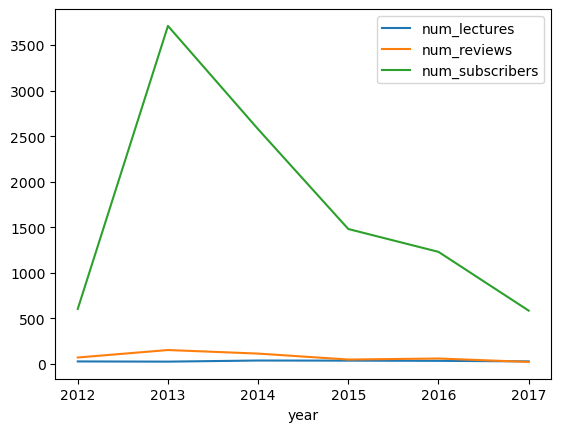

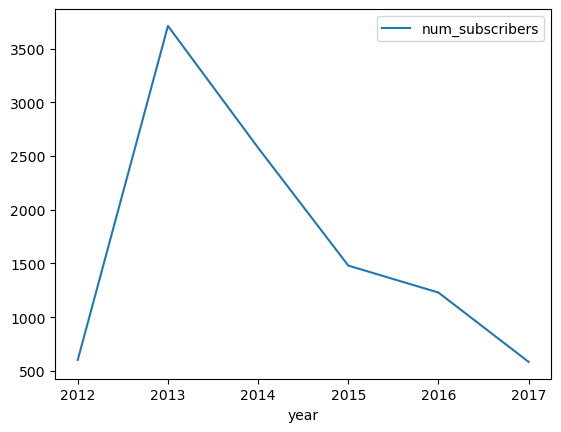

In [34]:
#fig, ax = plt.subplots(2,1,sharex="row")
ax_lec_rev_sub.plot()
ax_sub.plot()
plt.show()

#faire afficher "num_reviews" et "num_lectures" ensemble - "num_subscribers" seul - format (1,2) : one row - two col

In [35]:
average_sub = ud.groupby(by=["year"])[["num_subscribers"]].mean().sort_values(by='year', ascending=True)
average_sub
#average_price = ud.groupby(by=["year"])["num_lectures","num_reviews"].mean().sort_values(by='year', ascending=True)

,num_subscribers
year,
2012,603.333333
2013,3710.285714
2014,2576.161458
2015,1480.407080
2016,1229.530259
2017,584.300448


<AxesSubplot:xlabel='year'>

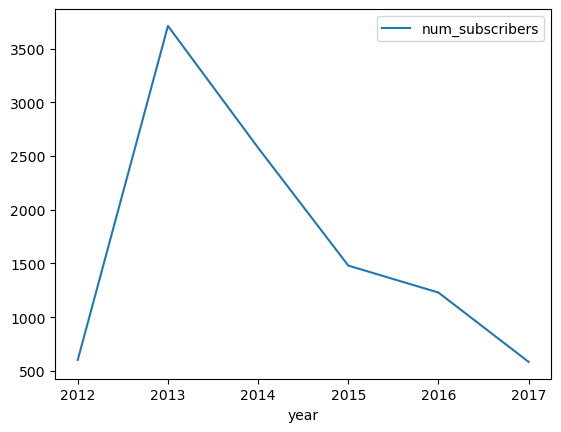

/var/folders/fp/nkvz8km55ybd4yzr2wcb2pjr0000gn/T/ipykernel_15663/1141754612.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax_lec_rev= ud.groupby(by=["year"])["num_lectures","num_reviews"].mean().sort_values(by='year', ascending=True)


<AxesSubplot:xlabel='year'>

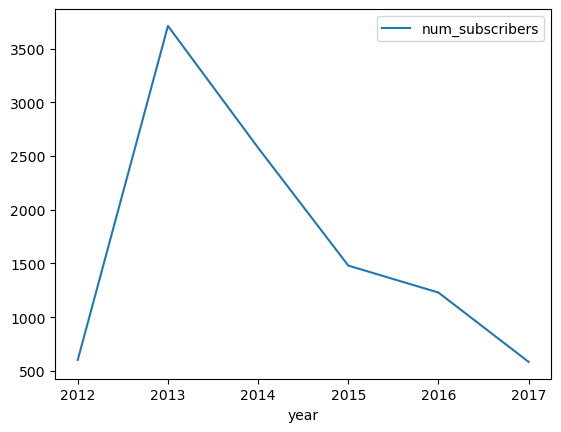

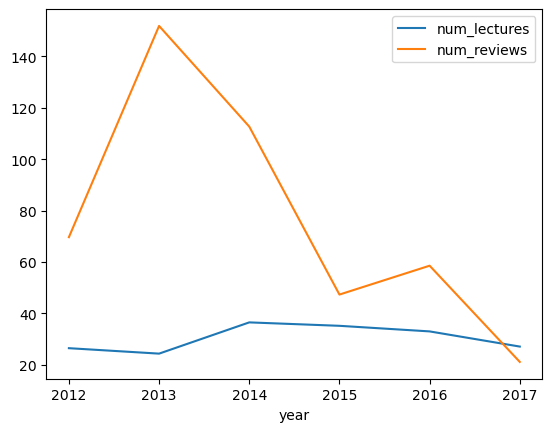

In [36]:
ax_sub.plot()
ax_lec_rev= ud.groupby(by=["year"])["num_lectures","num_reviews"].mean().sort_values(by='year', ascending=True)
ax_lec_rev.plot()

<AxesSubplot:xlabel='year'>

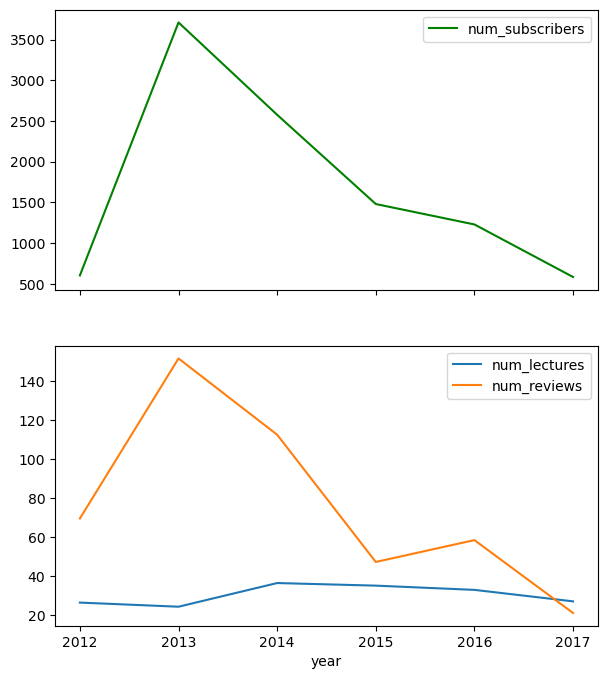

In [37]:
fig, axes = plt.subplots(2,1,figsize = (7, 8), sharex='all')

ax_sub.plot(ax=axes[0], color="green")
ax_lec_rev.plot(ax=axes[1])

In [91]:
#ud.groupby(by=["level"])[["level"]].count()

In [38]:
ud_2 = ud.loc[(ud["level"] != "All Levels")]

In [39]:
ud_3.groupby(by=["level"])[["level"]].count()

NameError: name 'ud_3' is not defined

In [40]:
ud_2.groupby(by=["level"])[["level"]].count()

,level
level,
Beginner Level,399
Expert Level,25
Intermediate Level,134


<AxesSubplot:ylabel='num_subscribers'>

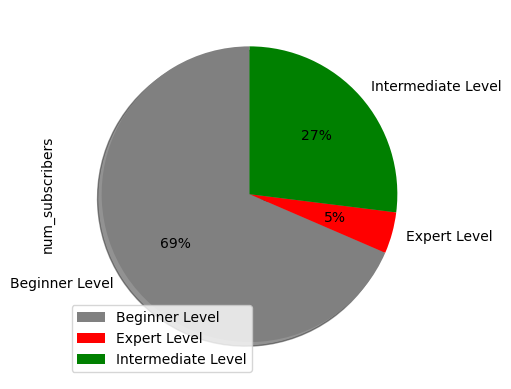

In [42]:
#plot = ud_2.plot.pie(y='level',figsize=(5, 5))

#df = pd.DataFrame('level', index=['Beginner', 'Intermediate', 'Expert'])
#plot = df.plot.pie(y='level', figsize=(5, 5))
#ud_2.groupby(['level']).sum().plot(kind='pie', y='level')

ud_2.groupby(['level']).sum().plot(kind='pie', y='num_subscribers',autopct='%1.0f%%',colors = ["grey","red","green"],shadow=True, startangle=90)

In [138]:
ud

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject,year
0,49798,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576,936,24,All Levels,5.6,8.0,2013-04-20T02:25:22Z,Business Finance,2013
1,48841,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659,4397,16,Beginner Level,9.5,1.5,2013-04-07T21:39:25Z,Business Finance,2013
2,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855,2698,15,All Levels,9.1,1.5,2013-12-25T19:53:34Z,Business Finance,2013
3,151668,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167,1463,8,All Levels,1.8,1.5,2014-05-27T16:22:16Z,Business Finance,2014
4,648826,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481,2347,174,All Levels,3.7,10.0,2016-01-21T01:38:48Z,Business Finance,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,885413,Foundations of Investing,https://www.udemy.com/foundations-of-investing/,40.0,0,0,18,Beginner Level,9.5,2.0,2016-07-27T21:07:46Z,Business Finance,2016
1187,1231958,60 Minutes to Fundamental Accounting Skills,https://www.udemy.com/60-minute-fundamental-ac...,75.0,0,0,9,All Levels,9.5,2.5,2017-06-28T21:55:29Z,Business Finance,2017
1188,1057040,Teeter-Totter Accounting,https://www.udemy.com/teeter-totter-accounting/,90.0,0,0,12,Intermediate Level,3.6,1.0,2017-02-08T22:15:56Z,Business Finance,2017
1189,1258666,Financial Statement Auditing Cycles,https://www.udemy.com/financial-statement-audi...,50.0,0,0,9,All Levels,1.5,2.0,2017-06-29T23:20:10Z,Business Finance,2017


In [158]:
#pd.crosstab([df['embark_town']], df['class'], values=df['fare'], aggfunc=len, margins=True, margins_name='Total', normalize='index')

#’pd.crosstab([df['alive']], df['class'], margins=True, margins_name='Total', normalize='columns')

# Afficher le % de cours en fonction du niveau

ud.pivot_table(index=['year'], values=["Rating","level"])

,Rating
year,
2012,4.950000
2013,6.717857
2014,6.836458
2015,6.981121
2016,6.785303
2017,7.149776
